# Project 4: West Nile Virus Prediction
Authors: Catherine Ang, Mei Lian, Wenna Loo

## Contents:
- [Problem Statement](#Problem-Statement)
- [Datasets](#Datasets)
- [Setup](#Setup)
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Next Steps](#Next-Steps)

## Problem Statement
As part of the newly hired data science team working in the division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE), we have been tasked to use the mosquito population data collected by the Chicago Department of Public Health (CDPH) to build a model that predicts outbreaks of the West Nile virus. Specifically, our model will use a combination of weather, time, and location features to predict the presence of West Nile virus within mosquito traps set up throughout Chicago. This will help the City of Chicago and CDPH more efficiently and effectively allocate resources towards preventing the transmission of this potentially deadly virus. 


### Background
West Nile virus is most commonly spread to humans through infected mosquitos. Around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death. In 2002, the first human cases of West Nile virus were reported in Chicago. By 2004 the City of Chicago and CDPH had established a comprehensive surveillance and control program that is still in effect today. Every week from late spring through the fall, mosquitos in traps across the city are tested for the virus. The results of these tests influence when and where the city will spray airborne pesticides to control adult mosquito populations.

This is clearly a supervised learning task, since the labels are provided (the expected output, i.e., binary representation of whether West Nile Virus was present within mosquito traps). It is also a classification task, since we are predicting a discrete class label. More specifically, this is a binary classification problem, since the ultimate goal is to build a classifier to distinguish between just two classes, whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present. 

### Performance Measure
We will evaluate the performance of our model using AUC (Area Under Curve) score as the North Star metric.

The AUC (Area Under Curve) score can be obtained by measuring the area under the receiver operating characteristic (ROC) curve. The ROC curve plots the true positive rate (TPR), also known as sensitivity or recall, against the false positive rate (FPR). The TPR is defined as $\frac{TP}{TP+FN}$, this metric corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points. In other words, the higher TPR, the fewer positive data points we will miss. The FPR is defined as $\frac{FP}{FP+TN}$, this metric corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points. In other words, the higher FPR, the more negative data points will be missclassified.

Our goal is to get AUC score as close to 1 as possible.

## Datasets

### Provided Data
The datasets used for analysis in this project are:
- [`train.csv`](../datasets/train.csv), [`test.csv`](../datasets/test.csv): the training and test set of the main dataset. The training set consists of data from 2007, 2009, 2011, and 2013, while in the test set we are requested to predict the test results for 2008, 2010, 2012, and 2014.
- [`spray.csv`](../datasets/spray.csv): GIS data of spraying efforts in 2011 and 2013
- [`weather.csv`](../datasets/weather.csv): weather data from 2007 to 2014. 


Every year from late-May to early-October, public health workers in Chicago setup mosquito traps scattered across the city. Every week from Monday through Wednesday, these traps collect mosquitos, and the mosquitos are tested for the presence of West Nile virus before the end of the week. The test results include the number of mosquitos, the mosquitos species, and whether or not West Nile virus is present in the cohort. 

**Main dataset**

These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. The location of the traps are described by the block number and street name. These attributes have been mapped into Longitude and Latitude in the dataset and are derived locations. 
For example, Block=79, and Street= "W FOSTER AVE" gives us an approximate address of "7900 W FOSTER AVE, Chicago, IL", which translates to (41.974089,-87.824812) on the map.

Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are postfixed with letters. For example, T220A is a satellite trap to T220. Not all the locations are tested at all times. Also, records exist only when a particular species of mosquitos is found at a certain trap at a certain time.


**Spray dataset**

The City of Chicago also does spraying to kill mosquitos. The GIS data for their spray efforts is from 2011 and 2013. Spraying can reduce the number of mosquitos in the area, and therefore might eliminate the appearance of West Nile virus. 


**Weather Data**

It is believed that hot and dry conditions are more favorable for West Nile virus than cold and wet. The dataset is from National Oceanic and Atmospheric Administration (NOAA) of the weather conditions of 2007 to 2014, during the months of the tests. 

Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level

Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level



### Data Dictionary


|      Feature      |   Type  |   Dataset  |                       Description                      |
|:------------------|:-------:|:----------:|:-------------------------------------------------------|
| **Id** | *integer* | test | The id of the record |
| **Date** | *datetime* | train/ test | Date that the WNV test is performed (YYYY-MM-DD)|
| **Address** | *object* | train/ test | Approximate trap address retrieved from GeoCoder |
| **Species** | *object* | train/ test | The species of mosquitos |
| **Block** | *integer* | train/ test | Block number of address |
| **Street** | *object* | train/ test | Street name |
| **Trap** | *object* | train/ test | Id of the trap |
| **AddressNumberAndStreet** | *object* | train/ test | Approximate address returned from GeoCoder |
| **Latitude** | *float* | train/ test | Latitude returned from GeoCoder |
| **Longitude** | *float* | train/ test | Longitude returned from GeoCoder |
| **AddressAccuracy** | *integer* | train/ test | Accuracy returned from GeoCoder |
| **NumMosquitos** | *integer* | train | Number of mosquitoes caught in this trap |
| **WnvPresent** | *integer* | train | Whether West Nile Virus was present in these mosquitos (1 = present; 0 = absent) |
| **Date** | *datetime* | spray | The date of the spray (YYYY-MM-DD)|
| **Time** | *object* | spray | The time of the spray |
| **Latitude** | *float* | spray | The latitude of the spray |
| **Longitude** | *float* | spray | The longitude of the spray |
| **Station** | *integer* | weather | Weather station (1 or 2) |
| **Date** | *datetime* | weather | Date of measurement (YYYY-MM-DD)|
| **Tmax** | *integer* | weather | Maximum daily temperature (in Degrees Fahrenheit, F) |
| **Tmin** | *integer* | weather | Minimum daily temperature (in Degrees Fahrenheit, F) |
| **Tavg** | *object* | weather | Average daily temperature (in Degrees Fahrenheit, F) |
| **Depart** | *object* | weather | Departure from normal temperature (in Degrees Fahrenheit, F) |
| **DewPoint** | *integer* | weather | Average Dew Point temperature (in Degrees Fahrenheit, F) |
| **WetBulb** | *object* | weather | Average Wet Bulb temperature (in Degrees Fahrenheit, F) |
| **Heat** | *object* | weather | Heating Degree Days (season begins with July) |
| **Cool** | *object* | weather | Cooling Degree Days (season begins with January) |
| **Sunrise** | *object* | weather | Time of sunrise (calculated) |
| **Sunset** | *object* | weather | Time of sunset (calculated) |
| **CodeSum** | *object* | weather | Code of significant weather phenomena |
| **Depth** | *object* | weather | Snow/ice depth on the ground in inches, measured at 1200 UTC |
| **Water1** | *object* | weather | Water equivalent in inches, measured at 1800 UTC |
| **SnowFall** | *object* | weather | Total snowfall precipitation for the day (in inches and tenths) |
| **PrecipTotal** | *object* | weather | Total water equivalent precipitation for the day (in inches and tenths).  |
| **StnPressure** | *object* | weather | Average station pressure (in inches of hg) |
| **SeaLevel** | *object* | weather | Average sea level pressure (in inches of hg) |
| **ResultSpeed** | *float* | weather | Resultant wind speed (mph) |
| **ResultDir** | *integer* | weather | Resultant wind direction (degrees) |
| **AvgSpeed** | *object* | weather | Average wind speed (mph) |

## Setup
All libraries used should be added here.

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import shapely
from shapely import geometry
from shapely import ops
from shapely.geometry import Point, LineString, Polygon, MultiPoint
from shapely.ops import nearest_points

from sklearn.neighbors import KernelDensity

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# path to save the figures
assets_path = '../assets'
os.makedirs(assets_path, exist_ok=True)

# Create a function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(assets_path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Data Import and Cleaning
Import the datasets required.

In [3]:
# set the input and output relative paths
input_path = '../datasets'
output_path = '../datasets_cleaned'
os.makedirs(output_path, exist_ok=True)

In [4]:
# write a function to load the train data
def load_train_data(filename='train.csv'):
    csv_train_path = os.path.join(input_path, filename)
    return pd.read_csv(csv_train_path, parse_dates=['Date'])

# write a function to load the test data
def load_test_data(filename='test.csv'):
    csv_test_path = os.path.join(input_path, filename)
    return pd.read_csv(csv_test_path, parse_dates=['Date'])

# write a function to load the spray data
def load_spray_data(filename='spray.csv'):
    csv_test_path = os.path.join(input_path, filename)
    return pd.read_csv(csv_test_path, parse_dates=['Date'])

# write a function to load the weather data
def load_weather_data(filename='weather.csv'):
    csv_test_path = os.path.join(input_path, filename)
    return pd.read_csv(csv_test_path, parse_dates=['Date'])

In [5]:
train_df = load_train_data()
test_df = load_test_data()
spray_df = load_spray_data()
weather_df = load_weather_data()

In [6]:
print('Our train dataset has {} rows and {} columns.'.format(train_df.shape[0], train_df.shape[1]))
print('Our test dataset has {} rows and {} columns.'.format(test_df.shape[0], test_df.shape[1]))
print('Our spray dataset has {} rows and {} columns.'.format(spray_df.shape[0], spray_df.shape[1]))
print('Our weather dataset has {} rows and {} columns.'.format(weather_df.shape[0], weather_df.shape[1]))

Our train dataset has 10506 rows and 12 columns.
Our test dataset has 116293 rows and 11 columns.
Our spray dataset has 14835 rows and 4 columns.
Our weather dataset has 2944 rows and 22 columns.


First, make sure that the test set has been put aside and we are only exploring the training set. 

In [7]:
datasets = [(train_df, 'Train'),
            (spray_df, 'Spray'),
            (weather_df, 'Weather')]

### Display data
Let’s take a look at the top five rows of each dataset using the DataFrame’s head() method.

In [8]:
# check the first five rows
for df, name in datasets:
    print(f"Displaying the first five rows of {name} dataset:" )
    display(df.head())
    print()

Displaying the first five rows of Train dataset:


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0



Displaying the first five rows of Spray dataset:


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858



Displaying the first five rows of Weather dataset:


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


According to the documentation provided for the weather dataset, if a value is missing or not available, it is replaced with either of these terms:

```python
['M', '-']
```

We'll create a function that helps us to view quick summaries of our datasets. 

In [9]:
def data_summary(df, df_name):
    """
    Quick summaries for all the variables in our data.
    """
    print(df_name, 'dataset')
    print()

    # check for duplicated rows
    print(f"Number of duplicated rows: {df[df.duplicated(keep=False)].shape[0]}")
    # check for any missing values, null or 'M' or '-'
    print(f"Number of missing values: {df.isin([np.nan, 'M', '-']).sum().sum()}")
    # check for any zero values
    print(f"Number of zero values: {df.isin(['0.0','0']).sum().sum()}")
    print()

    # print columns with missing values, null or 'M' or '-'
    print()
    print("Columns with missing values:")
    print(df.isin([np.nan, 'M', '-']).sum())
    print()
    
    # print columns with zero values
    print()
    print("Columns with zero values:")
    print(df.isin(['0.0','0']).sum())
    print()

    # check for dtypes
    print()
    print("Dtypes:")
    print(df.dtypes)
    print("_______________________________________________\n")

In [10]:
# display summary
for df, name in datasets:
    data_summary(df, name)

Train dataset

Number of duplicated rows: 1062
Number of missing values: 0
Number of zero values: 0


Columns with missing values:
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64


Columns with zero values:
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64


Dtypes:
Date                      datetime64[ns]
Address                           object
Species                           object
Block     

**Obvious issues in the train dataset:**
- There are 1062 duplicated rows.

**Obvious issues in the spray dataset:**
- There are 543 duplicated rows.
- The `Time` attribute has 584 missing values.

**Obvious issues in the weather dataset:**
- There are missing values in the following attributes: `Tavg` , `Depart`, `WetBulb`, `Heat`, `Cool`, `Sunrise`, `Sunset`, `Depth`, `Water1`, `SnowFall`, `PrecipTotal`, `StnPressure`, `SeaLevel`, and `AvgSpeed`.
    - `Tavg` attribute has 11 missing values.
    - `Depart` attribute has 1,472 missing values.
    - `WetBulb` attribute has 4 missing values.
    - `Heat` attribute has 11 missing values.
    - `Cool` attribute has 11 missing values.
    - `Sunrise` attribute has 1,472 missing values.
    - `Sunset` attribute has 1,472 missing values.
    - `Depth` attribute has 1,472 missing values.
    - `Water1` attribute has 2,944 missing values.
    - `SnowFall` attribute has 1,472 missing values.
    - `PrecipTotal` attribute has 2 missing values.
    - `StnPressure` attribute has 4 missing values.
    - `SeaLevel` attribute has 9 missing values.
    - `AvgSpeed` attribute has 3 missing values.
- There are zero values in the following attributes: `Heat`, `Depth`, and `Snowfall`.
    - `Heat` attribute has 1,870 zero values.
    - `Depth` attribute has 1,472 zero values.
    - `Snowfall` attribute has 1,459 zero values.

### Cleaning train dataset
Let's fix the errors in the **train** dataset. As the test results are organised in a way that the number of mosquitoes are capped at 50 for each record even when the samples are collected on the same day. We will combine these records into a single record:

In [11]:
# sum NumMosquitos
# as long as wnv is detected within the same trap/cohort in the same day, the mosquitoes captured are considered to have wnv
train_df = train_df.groupby([col for col in train_df.columns if col not in ['NumMosquitos', 'WnvPresent']]).sum().reset_index()

# re-map the values in WnvPresent
train_df['WnvPresent'] = train_df['WnvPresent'].map(lambda x : 1 if x > 0 else x)

Let's check to see if there are still any duplicates.

In [12]:
print(f"Number of duplicated rows: {train_df[train_df.duplicated(keep=False)].shape[0]}")

Number of duplicated rows: 0


In [13]:
# check the first five rows
display(train_df.head())

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0


In [14]:
print('Our train dataset has {} rows and {} columns now.'.format(train_df.shape[0], train_df.shape[1]))

Our train dataset has 8475 rows and 12 columns now.


### Cleaning spray dataset
Let's fix the errors in the **spray** dataset. We'll investigate the duplicated rows.

In [15]:
# investigate the duplicated rows
spray_df[spray_df.duplicated(keep=False)].head(10)

,Date,Time,Latitude,Longitude
484,2011-09-07,7:43:40 PM,41.983917,-87.793088
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
489,2011-09-07,7:44:32 PM,41.986460,-87.794225
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225
492,2011-09-07,7:44:32 PM,41.986460,-87.794225
493,2011-09-07,7:44:32 PM,41.986460,-87.794225
494,2011-09-07,7:44:32 PM,41.986460,-87.794225
495,2011-09-07,7:44:32 PM,41.986460,-87.794225
496,2011-09-07,7:44:32 PM,41.986460,-87.794225


There are multiple rows with the same date, time, latitude and longitude. It is unlikely that each row represents the number of times a location was sprayed at any one time. This could be a result of data collection error, hence we will proceed to drop them.

Let's look at the missing values in `Time` attribute.

In [16]:
display(spray_df[spray_df['Time'].isna()].head(10))
print(f"Percentage of missing values in Time attribute: {round((spray_df[['Time']].isna().sum().sum()/ len(spray_df)) * 100, 2)}%")

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
1035,2011-09-07,NaN,41.986372,-87.794862
1036,2011-09-07,NaN,41.986228,-87.795582
1037,2011-09-07,NaN,41.984836,-87.793998
1038,2011-09-07,NaN,41.984836,-87.794670
1039,2011-09-07,NaN,41.984884,-87.795198


Percentage of missing values in Time attribute: 3.94%


It seems that the time of spray for these rows are missing. Time data is probably too finely tuned for our needs, so we will just proceed to drop the `Time` attribute from the spray dataset.

In [17]:
# remove the duplicated rows
spray_df = spray_df[~spray_df.duplicated()]

In [18]:
# drop time attribute
spray_df = spray_df.drop(columns=["Time"])

In [19]:
# check the first five rows
display(spray_df.head())

,Date,Latitude,Longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


In [20]:
print('Our spray dataset has {} rows and {} columns now.'.format(spray_df.shape[0], spray_df.shape[1]))

Our spray dataset has 14294 rows and 3 columns now.


### Cleaning weather dataset
Let's fix the errors in the **weather** dataset. We'll look at the percentage of missing and zero values in our columns.

In [21]:
print("Percentage (%) of missing and zero values:\n")
print(round(weather_df.isin([np.nan, 'M', '-', '0', '0.0']).sum()/ len(weather_df) * 100, 2))

Percentage (%) of missing and zero values:

Station          0.00
Date             0.00
Tmax             0.00
Tmin             0.00
Tavg             0.37
Depart          50.00
DewPoint         0.00
WetBulb          0.14
Heat            63.89
Cool             0.37
Sunrise         50.00
Sunset          50.00
CodeSum          0.00
Depth          100.00
Water1         100.00
SnowFall        99.56
PrecipTotal      0.07
StnPressure      0.14
SeaLevel         0.31
ResultSpeed      0.00
ResultDir        0.00
AvgSpeed         0.10
dtype: float64


In [22]:
# drop columns due to high percentage of missing and zero values (>99.5% null or 'M' or '-' or '0' or '0.0')
weather_df = weather_df.drop(columns=['Depth', 'Water1', 'SnowFall'])

We'll create a function to impute the missing values in `Tavg`, `Heat`, and `Cool`.

In [23]:
# define a function to calculate average temperature, heating degree days, and cooling degree days
def impute_tavg_heat_cool(df):
    # calculate the missing values for Tavg
    if df['Tavg'] == 'M':
        # Tavg = (Tmax + Tmin)/2 
        # round up to the nearest whole number
        df['Tavg'] = round((df['Tmax'] + df['Tmin']) / 2)
        
    # calculate missing values for heating degree days, and cooling degree days
    # if Tavg is above 65°F, we subtract 65 from the mean and the result is Cooling Degree Days
    # if Tavg is below 65°F, we subtract the mean from 65 and the result is Heating Degree Days
    if df['Cool'] == 'M' or df['Heat'] == 'M':
        if df['Tavg'] > 65:
            df['Cool'] = df['Tavg'] - 65
            df['Heat'] = 0
        elif df['Tavg'] < 65:
            df['Cool'] = 0
            df['Heat'] = 65 - df['Tavg']
        else:
            df['Cool'] = df['Heat'] = 0
    return df

In [24]:
weather_df = weather_df.apply(impute_tavg_heat_cool, axis=1)

Based on the initial analysis done so far, we're suspecting that Station 2 does not have any information in `Depart`, `Sunrise`, and `Sunset` attributes. 

Let's verify this:

In [25]:
station1 = weather_df[weather_df['Station'] == 1]

print("Percentage (%) of missing values in Station 1:\n")
print(round(station1.isin([np.nan, 'M', '-']).sum()/ len(station1) * 100, 2))

Percentage (%) of missing values in Station 1:

Station        0.00
Date           0.00
Tmax           0.00
Tmin           0.00
Tavg           0.00
Depart         0.00
DewPoint       0.00
WetBulb        0.20
Heat           0.00
Cool           0.00
Sunrise        0.00
Sunset         0.00
CodeSum        0.00
PrecipTotal    0.00
StnPressure    0.14
SeaLevel       0.34
ResultSpeed    0.00
ResultDir      0.00
AvgSpeed       0.00
dtype: float64


In [26]:
station2 = weather_df[weather_df['Station'] == 2]

print("Percentage (%) of missing values in Station 2:\n")
print(round(station2.isin([np.nan, 'M', '-']).sum()/ len(station2) * 100, 2))

Percentage (%) of missing values in Station 2:

Station          0.00
Date             0.00
Tmax             0.00
Tmin             0.00
Tavg             0.00
Depart         100.00
DewPoint         0.00
WetBulb          0.07
Heat             0.00
Cool             0.00
Sunrise        100.00
Sunset         100.00
CodeSum          0.00
PrecipTotal      0.14
StnPressure      0.14
SeaLevel         0.27
ResultSpeed      0.00
ResultDir        0.00
AvgSpeed         0.20
dtype: float64


It seems that `Depart`, `Sunrise`, and `Sunset` values are not normally reported or available for Station 2.

We'll create a function to impute `Depart` values from Station 1's readings to Station 2's readings.

In [27]:
# create a function to extract 30-year normal temperature from station 1's readings
def calculate_normal(df):
    if df['Station'] == 1:
        df['Normal'] = int(df['Tavg']) - int(df['Depart'])
    return df

In [28]:
weather_df = weather_df.apply(calculate_normal, axis=1)

# display the first six rows
display(weather_df.head(6))

,AvgSpeed,CodeSum,Cool,Date,Depart,DewPoint,Heat,Normal,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,Station,StnPressure,Sunrise,Sunset,Tavg,Tmax,Tmin,WetBulb
0,9.2,,2,2007-05-01,14,51,0,53.0,0.00,27,1.7,29.82,1,29.10,0448,1849,67,83,50,56
1,9.6,,3,2007-05-01,M,51,0,NaN,0.00,25,2.7,29.82,2,29.18,-,-,68,84,52,57
2,13.4,BR,0,2007-05-02,-3,42,14,54.0,0.00,4,13.0,30.09,1,29.38,0447,1850,51,59,42,47
3,13.4,BR HZ,0,2007-05-02,M,42,13,NaN,0.00,2,13.3,30.08,2,29.44,-,-,52,60,43,47
4,11.9,,0,2007-05-03,2,40,9,54.0,0.00,7,11.7,30.12,1,29.39,0446,1851,56,66,46,48
5,13.2,HZ,0,2007-05-03,M,40,7,NaN,0.00,6,12.9,30.12,2,29.46,-,-,58,67,48,50


In [29]:
# apply 30-year normal temperature to station 2's readings using forward fill
weather_df['Normal'] = weather_df['Normal'].ffill()

In [30]:
# create a function to calculate average temperature departure from normal
def impute_depart(df):
    if df['Station'] == 2:
        df['Depart'] = int(df['Tavg']) - int(df['Normal'])
    return df

In [31]:
weather_df = weather_df.apply(impute_depart, axis=1)

# display the first six rows
display(weather_df.head(6))

,AvgSpeed,CodeSum,Cool,Date,Depart,DewPoint,Heat,Normal,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,Station,StnPressure,Sunrise,Sunset,Tavg,Tmax,Tmin,WetBulb
0,9.2,,2,2007-05-01,14,51,0,53.0,0.00,27,1.7,29.82,1,29.10,0448,1849,67,83,50,56
1,9.6,,3,2007-05-01,15,51,0,53.0,0.00,25,2.7,29.82,2,29.18,-,-,68,84,52,57
2,13.4,BR,0,2007-05-02,-3,42,14,54.0,0.00,4,13.0,30.09,1,29.38,0447,1850,51,59,42,47
3,13.4,BR HZ,0,2007-05-02,-2,42,13,54.0,0.00,2,13.3,30.08,2,29.44,-,-,52,60,43,47
4,11.9,,0,2007-05-03,2,40,9,54.0,0.00,7,11.7,30.12,1,29.39,0446,1851,56,66,46,48
5,13.2,HZ,0,2007-05-03,4,40,7,54.0,0.00,6,12.9,30.12,2,29.46,-,-,58,67,48,50


In [32]:
# drop the 30-year normal temperature column
weather_df = weather_df.drop(columns=['Normal'])

We'll apply the `sunset` and `sunrise` values from Station 1's readings to Station 2's readings using forward fill

In [33]:
# replace '-' with np.nan in 'Sunrise' and 'Sunset' cols
weather_df["Sunrise"].replace({"-": np.nan}, inplace=True)
weather_df["Sunset"].replace({"-": np.nan}, inplace=True)

# impute sunrise/sunset
cols = ['Sunrise', 'Sunset']
weather_df.loc[:,cols] = weather_df.loc[:,cols].ffill()

In [34]:
# display the first six rows
display(weather_df.head(6))

,AvgSpeed,CodeSum,Cool,Date,Depart,DewPoint,Heat,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,Station,StnPressure,Sunrise,Sunset,Tavg,Tmax,Tmin,WetBulb
0,9.2,,2,2007-05-01,14,51,0,0.00,27,1.7,29.82,1,29.10,0448,1849,67,83,50,56
1,9.6,,3,2007-05-01,15,51,0,0.00,25,2.7,29.82,2,29.18,0448,1849,68,84,52,57
2,13.4,BR,0,2007-05-02,-3,42,14,0.00,4,13.0,30.09,1,29.38,0447,1850,51,59,42,47
3,13.4,BR HZ,0,2007-05-02,-2,42,13,0.00,2,13.3,30.08,2,29.44,0447,1850,52,60,43,47
4,11.9,,0,2007-05-03,2,40,9,0.00,7,11.7,30.12,1,29.39,0446,1851,56,66,46,48
5,13.2,HZ,0,2007-05-03,4,40,7,0.00,6,12.9,30.12,2,29.46,0446,1851,58,67,48,50


Let's take a look at what are the remaining columns with missing values.

In [35]:
# remaining columns with missing values 
weather_df.isin(['M', np.nan]).sum()[weather_df.isin(['M', np.nan]).sum() > 0]

AvgSpeed       3
PrecipTotal    2
SeaLevel       9
StnPressure    4
WetBulb        4
dtype: int64

For the remaining columns with missing values, we will impute the missing values using multiple imputation method. Scikit-Learn provides a handy class to take care of missing values: IterativeImputer.

The IterativeImputer performs multiple regressions on random samples of the data and aggregates for imputing the missing values.

In [36]:
# get sample rows with missing values
sample_incomplete_rows = weather_df[weather_df.isin(['M', np.nan]).any(axis=1)].head()
display(sample_incomplete_rows)

,AvgSpeed,CodeSum,Cool,Date,Depart,DewPoint,Heat,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,Station,StnPressure,Sunrise,Sunset,Tavg,Tmax,Tmin,WetBulb
87,M,,12,2007-06-13,9,53,0,0.00,5,7.0,M,2,M,0416,1927,77,86,68,62
117,13.3,,2,2007-06-28,-4,56,0,M,2,12.2,30.07,2,29.43,0419,1931,67,73,61,61
119,8.2,,0,2007-06-29,-7,56,1,M,2,7.4,30.11,2,29.47,0419,1931,64,71,56,60
832,7.9,RA BR,6,2009-06-18,1,63,0,0.12,16,6.7,M,1,29.08,0416,1929,71,80,61,67
848,8.2,,13,2009-06-26,7,60,0,0.00,4,6.4,29.85,1,M,0418,1931,78,86,69,M


In [37]:
# replace missing ('M') values with np.nan and trace ('T'/'  T') values as 0.01
# When it comes to liquid precipitation (rainfall)
# meteorologists don't measure anything under 0.01 inch (one hundredth of an inch)
weather_df.replace({"M": np.nan}, inplace=True)
weather_df.replace({"T": 0.01, "  T": 0.01}, inplace=True)

In [38]:
# create a function to impute the remaining columns with missing values
def impute_missing_values(df, missing_cols):
    
    ## Applying multiple imputation for missing numerical values
    # Initialize IterativeImputer
    imp = IterativeImputer(random_state=123)

    # Copy df to imp_df_numeric_missing
    imp_df_numeric_missing = df.copy(deep=True)

    # Impute using fit_tranform on the missing_cols of the dataframe
    imp_df_numeric_missing[missing_cols] = np.round(imp.fit_transform(df[missing_cols]),2)
    
    return imp_df_numeric_missing

In [39]:
# get the missing columns' name
missing_cols = list(weather_df.isnull().sum()[weather_df.isnull().sum() > 0].index)

# impute the missing values
weather_df = impute_missing_values(weather_df, missing_cols)

In [40]:
# set WetBulb as int
weather_df['WetBulb'] = weather_df['WetBulb'].astype(int)

# round AvgSpeed to 1 d.p
weather_df['AvgSpeed'] = round(weather_df['AvgSpeed'], 1)

In [41]:
# compare the sample rows with missing numerical values with its imputed values
display(sample_incomplete_rows.loc[sample_incomplete_rows.index.values].head())
display(weather_df.loc[sample_incomplete_rows.index.values].head())

,AvgSpeed,CodeSum,Cool,Date,Depart,DewPoint,Heat,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,Station,StnPressure,Sunrise,Sunset,Tavg,Tmax,Tmin,WetBulb
87,M,,12,2007-06-13,9,53,0,0.00,5,7.0,M,2,M,0416,1927,77,86,68,62
117,13.3,,2,2007-06-28,-4,56,0,M,2,12.2,30.07,2,29.43,0419,1931,67,73,61,61
119,8.2,,0,2007-06-29,-7,56,1,M,2,7.4,30.11,2,29.47,0419,1931,64,71,56,60
832,7.9,RA BR,6,2009-06-18,1,63,0,0.12,16,6.7,M,1,29.08,0416,1929,71,80,61,67
848,8.2,,13,2009-06-26,7,60,0,0.00,4,6.4,29.85,1,M,0418,1931,78,86,69,M


,AvgSpeed,CodeSum,Cool,Date,Depart,DewPoint,Heat,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,Station,StnPressure,Sunrise,Sunset,Tavg,Tmax,Tmin,WetBulb
87,8.3,,12,2007-06-13,9,53,0,0.00,5,7.0,29.97,2,29.29,0416,1927,77,86,68,62
117,13.3,,2,2007-06-28,-4,56,0,0.09,2,12.2,30.07,2,29.43,0419,1931,67,73,61,61
119,8.2,,0,2007-06-29,-7,56,1,0.03,2,7.4,30.11,2,29.47,0419,1931,64,71,56,60
832,7.9,RA BR,6,2009-06-18,1,63,0,0.12,16,6.7,29.77,1,29.08,0416,1929,71,80,61,67
848,8.2,,13,2009-06-26,7,60,0,0.00,4,6.4,29.85,1,29.17,0418,1931,78,86,69,61


In [42]:
# verify that there are no more missing values
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   AvgSpeed     2944 non-null   float64       
 1   CodeSum      2944 non-null   object        
 2   Cool         2944 non-null   object        
 3   Date         2944 non-null   datetime64[ns]
 4   Depart       2944 non-null   object        
 5   DewPoint     2944 non-null   int64         
 6   Heat         2944 non-null   object        
 7   PrecipTotal  2944 non-null   float64       
 8   ResultDir    2944 non-null   int64         
 9   ResultSpeed  2944 non-null   float64       
 10  SeaLevel     2944 non-null   float64       
 11  Station      2944 non-null   int64         
 12  StnPressure  2944 non-null   float64       
 13  Sunrise      2944 non-null   object        
 14  Sunset       2944 non-null   object        
 15  Tavg         2944 non-null   object        
 16  Tmax  

`Cool`, `Depart`, `Heat`, `Sunrise`, `Sunset`, and `Tavg` are still of object types, let's convert them to int type.

In [43]:
columns = ['Cool', 'Depart', 'Heat', 'Sunrise', 'Sunset', 'Tavg']

for col in weather_df.columns:
    if col in columns:
        weather_df[col] = weather_df[col].astype(int)
    else:
        continue
        
# examine the dtypes
weather_df[columns].dtypes

Cool       int32
Depart     int32
Heat       int32
Sunrise    int32
Sunset     int32
Tavg       int32
dtype: object

We'll take a look at the unqiue values available in the `CodeSum` attribute.

In [44]:
display(weather_df['CodeSum'].unique())

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

It seems that multiple weather types can be observed in a day. We can see that some of the codes are combined together. We'll probably have to split each code up in order for it to be useful in our analysis and modelling later on.

In [45]:
# ensure that each code has proper spacing
codes = ['+FC','FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL',
         'IC', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'VA', 'DU', 'DS',
         'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR',
         'BC', 'BL', 'VC']

weather_df['CodeSum'] = weather_df['CodeSum'].apply(lambda x: ' '.join([t for t in x.split(' ') if t in codes]))
weather_df['CodeSum'].replace({"": " "}, inplace=True)

In [46]:
display(weather_df['CodeSum'].unique())

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'RA HZ', 'RA BR HZ',
       'BR HZ FU', 'RA HZ FU', 'TS RA BR HZ', 'DZ BR', 'TS BR HZ',
       'RA DZ BR HZ', 'TS RA BR', 'TS RA', 'TS BR', 'RA DZ FG+ BR',
       'RA FG+ BR', 'RA DZ', 'RA DZ BR', 'TS RA HZ', 'RA FG+ FG BR',
       'DZ FG+ FG BR HZ', 'RA BR SQ', 'TS', 'FG+ BR HZ', 'RA SN',
       'DZ BR HZ', 'RA BR FU', 'DZ', 'FG+ BR', 'FG+ FG BR', 'RA FG BR',
       'RA DZ SN', 'FG+ FG BR HZ', 'TS RA FG BR', 'TS RA FG+ FG BR',
       'RA DZ FG+ FG BR', 'FU', 'TS HZ', 'TS GR RA BR', 'HZ FU',
       'RA BR HZ FU', 'RA FG+ FG BR HZ', 'FG+', 'BR SQ', 'FG BR HZ',
       'TS RA FG BR HZ', 'RA DZ FG+ BR HZ', 'RA SN BR'], dtype=object)

### Inputing more features to train/test

In [47]:
# create a function to add Year, Month, Week and Day of Week features
def add_date_features(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].apply(lambda x: x.year)
    df['Month'] = df['Date'].apply(lambda x: x.month)
    df['Week'] = df['Date'].apply(lambda x: x.week)
    df['DayOfWeek'] = df['Date'].apply(lambda x: x.dayofweek)
    return df

In [48]:
# create a function to calculate the station nearest to the traps
def closest_station(df):
    # get latlong
    df['LatLong'] = [(x, y) for x, y in zip(df['Latitude'], df['Longitude'])]
    # create coord
    df['Coord'] = [Point(x, y) for x, y in zip(df['Latitude'], df['Longitude'])]
    
    # impute the points for station 1 and 2
    station_points = MultiPoint([Point(41.995, -87.933), Point(41.786, -87.752)])
    # calculate the station nearest to the traps
    df['Nearest_Station'] = df['Coord'].map(lambda x : 1 if nearest_points(station_points, x)[0] == station_points[0] else 2)
    return df

In [49]:
# add more features to train
train_df = add_date_features(train_df)
train_df = closest_station(train_df)
                           
# add more features to test                      
test_df = add_date_features(test_df)
test_df = closest_station(test_df)

In [50]:
# display the first five rows
display(train_df.head())
display(test_df.head())

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Week,DayOfWeek,LatLong,Coord,Nearest_Station
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0,2007,5,22,1,"(41.867108, -87.654224)",POINT (41.867108 -87.654224),2
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0,2007,5,22,1,"(41.867108, -87.654224)",POINT (41.867108 -87.654224),2
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0,2007,5,22,1,"(41.862292, -87.64886)",POINT (41.862292 -87.64886),2
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0,2007,5,22,1,"(41.896282, -87.655232)",POINT (41.896282 -87.655232),2
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0,2007,5,22,1,"(41.907645, -87.760886)",POINT (41.907645 -87.760886),2


,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Year,Month,Week,DayOfWeek,LatLong,Coord,Nearest_Station
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2,"(41.95469, -87.800991)",POINT (41.95469 -87.800991),1
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2,"(41.95469, -87.800991)",POINT (41.95469 -87.800991),1
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2,"(41.95469, -87.800991)",POINT (41.95469 -87.800991),1
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2,"(41.95469, -87.800991)",POINT (41.95469 -87.800991),1
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,2008,6,24,2,"(41.95469, -87.800991)",POINT (41.95469 -87.800991),1


### Save the cleaned dataframes as csv file

In [51]:
# Save cleaned training data
train_df.to_csv(output_path + '/train_cleaned.csv', index=False)

# Save cleaned spray data
spray_df.to_csv(output_path + '/spray_cleaned.csv', index=False)

# Save cleaned weather data
weather_df.to_csv(output_path + '/weather_cleaned.csv', index=False)

#  Save cleaned test data
test_df.to_csv(output_path + '/test_cleaned.csv', index=False)

## Exploratory Data Analysis
### Exploring the NumMosquitos and WnvPresent variables

In [52]:
print("Breakdown of species captured in percentage (%):")
# view the categories of species present
(train_df[['Species', 'NumMosquitos']].groupby(by='Species').sum() / train_df[['NumMosquitos']].sum()) * 100

Breakdown of species captured in percentage (%):


,NumMosquitos
Species,
CULEX ERRATICUS,0.005184
CULEX PIPIENS,33.080073
CULEX PIPIENS/RESTUANS,49.073231
CULEX RESTUANS,17.351284
CULEX SALINARIUS,0.107376
CULEX TARSALIS,0.005184
CULEX TERRITANS,0.377669


                        NumMosquitos  WnvPresent
Species                                         
CULEX ERRATICUS                    7           0
CULEX TARSALIS                     7           0
CULEX SALINARIUS                 145           0
CULEX TERRITANS                  510           0
CULEX RESTUANS                 23431          48
CULEX PIPIENS                  44671         184
CULEX PIPIENS/RESTUANS         66268         225



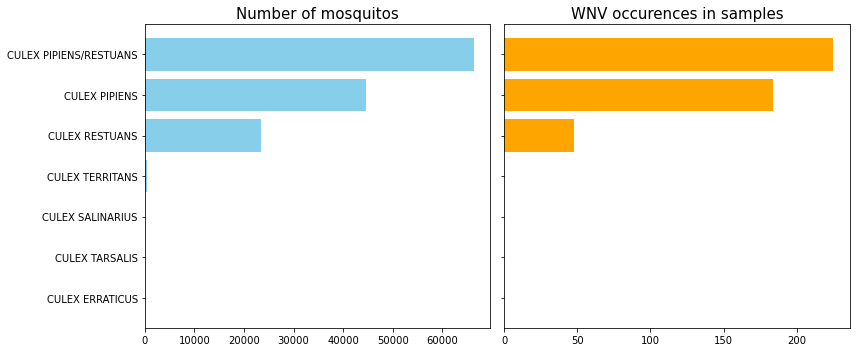

In [53]:
species_wnv = train_df[['Species', 'NumMosquitos', 'WnvPresent']].groupby(by='Species').sum().sort_values('NumMosquitos', ascending=True)
print(species_wnv)
print()

# reset the index after groupby
species_wnv.reset_index(inplace=True)

fig, ax = plt.subplots(ncols = 2, figsize=(12,5), sharey=True)

# plot number of mosquitoes
ax[0].barh(species_wnv['Species'], species_wnv['NumMosquitos'], color='skyblue')
ax[0].set_title('Number of mosquitos', fontsize=15)

# plot occurrence of WNV
ax[1].barh(species_wnv['Species'], species_wnv['WnvPresent'], color='orange')
ax[1].set_title('WNV occurences in samples', fontsize=15)

plt.tight_layout()

From the tables and graphs above, we can see that there are 6 species of mosquitos identified. However, not all species carry WNV. 
The 2 species which are the main carriers of WNV are CULEX PIPIENS and CULEX RESTUANS. They comprise 99.5% of the mosquitos captured in the traps.

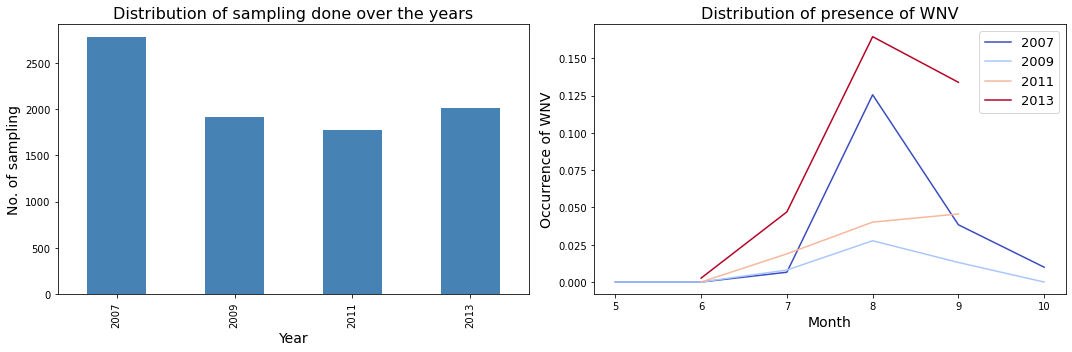

In [54]:
fig, ax = plt.subplots(ncols = 2, figsize=(15,5))

# plot distribution of sampling done over the years
train_df['Year'].value_counts().sort_index().plot(kind='bar', ax = ax[0], color='steelblue')
ax[0].set_title('Distribution of sampling done over the years', fontsize=16)
ax[0].set_ylabel('No. of sampling', fontsize=14)
ax[0].set_xlabel('Year',fontsize=14)

# plot distribution of presence of WNV
sns.lineplot(data = train_df, x='Month', y='WnvPresent', hue='Year', ci = None, 
             palette = 'coolwarm', ax = ax[1])
ax[1].legend(fontsize = 13)
ax[1].set_title('Distribution of presence of WNV', fontsize=16)
ax[1].set_xlabel('Month',fontsize=14)
ax[1].set_ylabel('Occurrence of WNV',fontsize=14)

plt.tight_layout()

From the bar chart on the left, we observe that the total number of the traps done each year has reduced since 2007. From the line graph on the right, we can see that is an increasing prevalence of WNV during summer - an increasing trend from June, July till it peaks in August, before declining slightly in September. In August 2013, the occurrence is the highest - compared to the earlier years during the same month.

We will look into analysing weather information later on.

Saving figure WNV Outbreak Locations


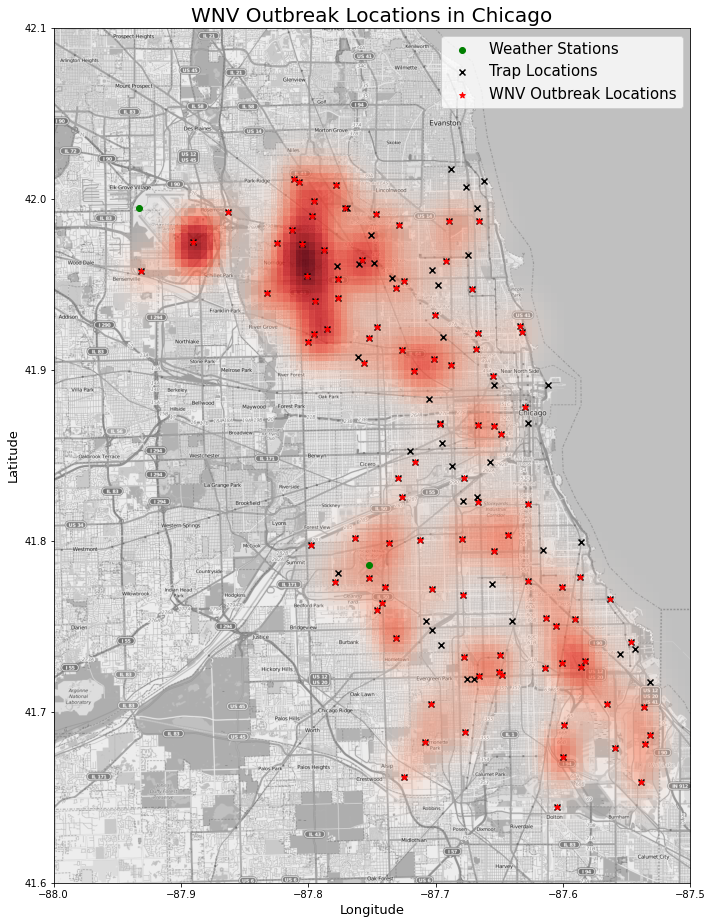

In [55]:
# plot a map of the WNV outbreaks
mapdata = np.loadtxt(input_path + "/mapdata_copyright_openstreetmap_contributors.txt")

alpha_cm1 = plt.cm.Reds
alpha_cm1._init()
alpha_cm1._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm1.N) / 10 - 1)[::-1]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# traps where only WNV is present
wnv = train_df[train_df['WnvPresent'] == 1]
wnv = wnv.groupby(['Date', 'Trap','Longitude', 'Latitude'])['WnvPresent'].max().reset_index()
X1 = wnv[['Longitude', 'Latitude']].values
kd1 = KernelDensity(bandwidth=0.015)
kd1.fit(X1)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv1 = np.exp(kd1.score_samples(gridpoints).reshape(100,100))

# kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv1, origin='lower', cmap=alpha_cm1, extent=lon_lat_box, aspect=aspect)

# weather stations
station1 = [-87.933, 41.995]
station2 = [-87.752, 41.786]
station_locations = np.array([station1] + [station2])
plt.scatter(station_locations[:,0], station_locations[:,1], marker='o', c='g', label='Weather Stations')

# trap locations
trap_locations = train_df[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(trap_locations[:,0], trap_locations[:,1], marker='x', c='black', label='Trap Locations')

# wnv outbreak locations
wnv_locations = train_df[train_df['WnvPresent'] == 1][['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(wnv_locations[:,0], wnv_locations[:,1], marker='*', c='r', label='WNV Outbreak Locations')

plt.title('WNV Outbreak Locations in Chicago', fontsize = 20)
plt.legend(fontsize=15)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)

save_fig('WNV Outbreak Locations')

This map above helps us to identify the mosquito trap density with WNV infections. Area with the darker red indicates that the region has more mosquitoes that carry the WNV. As observed, the occurences of West Nile virus is more prevalent near bodies of water and O’Hare airport. 

The visualisation on WNV outbreak locations will be helpful to the City of Chicago and CDPH to make a more informed decision on which areas are the hot-spots, and will have a higher priority when it comes to allocating sprays.

### Analysing Spray Efficacy

We're interested to analyse how effective has spraying been to reduce the number of mosquitos population, and the appearance of West Nile virus.

In [56]:
spray_df['Year'] = pd.to_datetime(spray_df['Date']).apply(lambda x: x.year)
spray_df['Week'] = pd.to_datetime(spray_df['Date']).apply(lambda x: x.week)

In [57]:
def plot_spray_efficacy(df, spray=spray_df):
    for year in [2011, 2013]:
        fig, ax1 = plt.subplots(figsize=(10,4))
        temp_df = df[df['Year']==year].groupby(['Date'])['NumMosquitos'].sum().to_frame()

        sns.lineplot(x=temp_df.index, y=temp_df['NumMosquitos'],
                     ci=None, color='blue', label='NumMosquitos', ax=ax1)
        ax1.set_ylabel('NumMosquitos', fontsize=13)
        ax1.legend(loc=1)
        
        if year in spray['Year'].unique():
            for date in spray[spray['Year'] == year].groupby('Date').mean().index:
                plt.axvline(date, linestyle='--', color='grey', label='Spray')
        
        plt.legend(['NumMosquitos', 'Spray'])
        plt.title(f'NumMosquitos in {year}')
        plt.tight_layout()

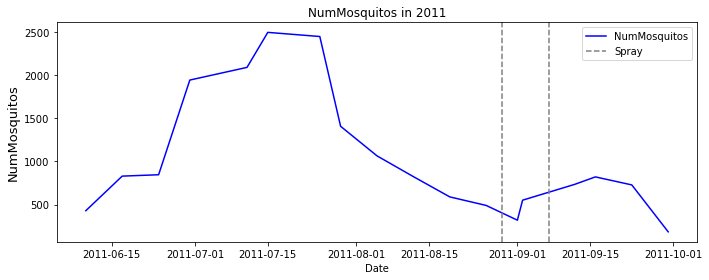

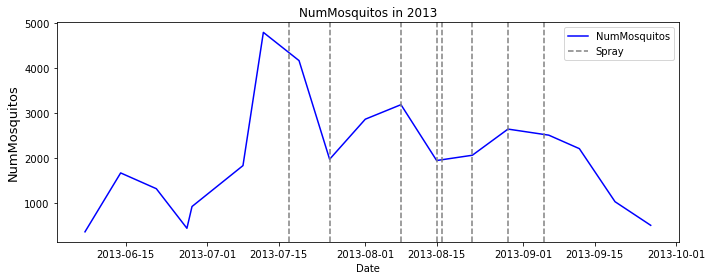

In [58]:
plot_spray_efficacy(train_df)

It seems that spraying is only effective in keeping the mosquito population under control on certain days. We are suspecting that this could be due to improper spray coverage. Let's verify this.

Saving figure Spray Locations


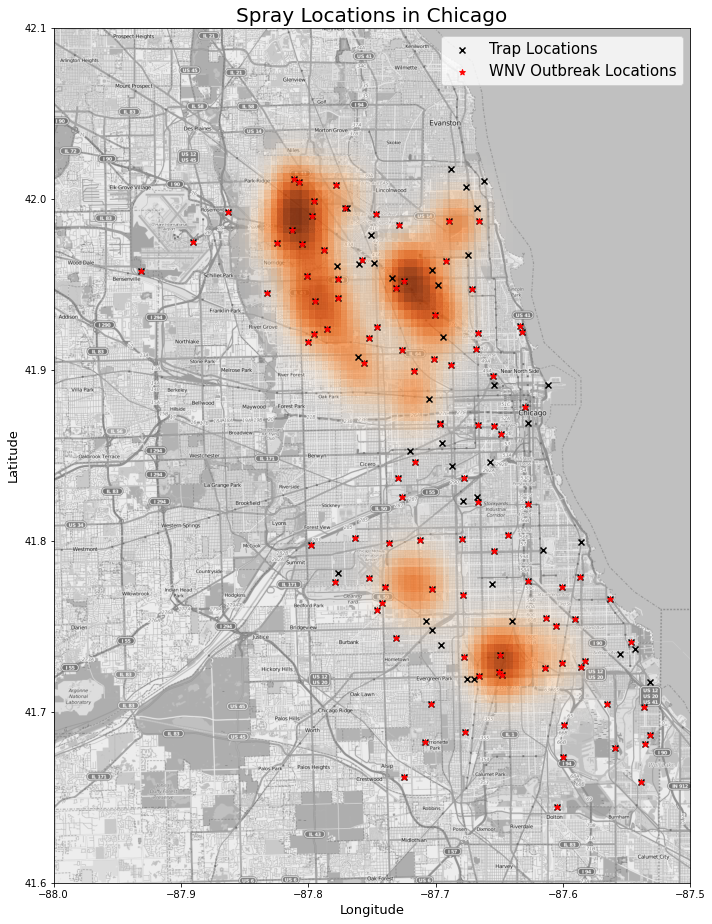

In [59]:
alpha_cm = plt.cm.Oranges
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-88, -87.5, 41.6, 42.1)

# spray location
X = spray_df[['Longitude', 'Latitude']].drop_duplicates().values
kd = KernelDensity(bandwidth=0.015)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

# kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

# trap locations
trap_locations = train_df[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(trap_locations[:,0], trap_locations[:,1], marker='x', c='black', label='Trap Locations')

# wnv outbreak locations
wnv_locations = train_df[train_df['WnvPresent'] == 1][['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(wnv_locations[:,0], wnv_locations[:,1], marker='*', c='r', label='WNV Outbreak Locations')

plt.title('Spray Locations in Chicago', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)

save_fig('Spray Locations')

This map above helps us to visualise the spray locations in Chicago. Area with the darker orange indicates that the region has more spray concentration area and the area with lighter orange means that less spray concentration area. We can see that spray area fails to fully overlap with the virus outbreak. This is a cause for concern and proves our suspicion of improper spray coverage.

### Weather effect on WNV
Let's further analyse our weather information to understand how it impacts the occurence of West Nile virus. We'll merge the weather data with our training set.

In [60]:
# merge dataframes
merged_df = pd.merge(train_df, weather_df,
                     how="left", left_on=['Date', 'Nearest_Station'],
                     right_on=['Date', 'Station'])

merged_df.drop(columns='Nearest_Station', inplace=True)

# view the first few rows
display(merged_df.head())

# print shape
print('Our train dataset has {} rows and {} columns.'.format(train_df.shape[0], train_df.shape[1]))
print('Our merged dataset has {} rows and {} columns.'.format(merged_df.shape[0], merged_df.shape[1]))

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Week,DayOfWeek,LatLong,Coord,AvgSpeed,CodeSum,Cool,Depart,DewPoint,Heat,PrecipTotal,ResultDir,ResultSpeed,SeaLevel,Station,StnPressure,Sunrise,Sunset,Tavg,Tmax,Tmin,WetBulb
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0,2007,5,22,1,"(41.867108, -87.654224)",POINT (41.867108 -87.654224),7.4,BR HZ,12,13,59,0,0.0,16,5.8,30.09,2,29.44,421,1917,77,88,65,66
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0,2007,5,22,1,"(41.867108, -87.654224)",POINT (41.867108 -87.654224),7.4,BR HZ,12,13,59,0,0.0,16,5.8,30.09,2,29.44,421,1917,77,88,65,66
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,0,2007,5,22,1,"(41.862292, -87.64886)",POINT (41.862292 -87.64886),7.4,BR HZ,12,13,59,0,0.0,16,5.8,30.09,2,29.44,421,1917,77,88,65,66
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0,2007,5,22,1,"(41.896282, -87.655232)",POINT (41.896282 -87.655232),7.4,BR HZ,12,13,59,0,0.0,16,5.8,30.09,2,29.44,421,1917,77,88,65,66
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,0,2007,5,22,1,"(41.907645, -87.760886)",POINT (41.907645 -87.760886),7.4,BR HZ,12,13,59,0,0.0,16,5.8,30.09,2,29.44,421,1917,77,88,65,66


Our train dataset has 8475 rows and 19 columns.
Our merged dataset has 8475 rows and 36 columns.


**Temperature**

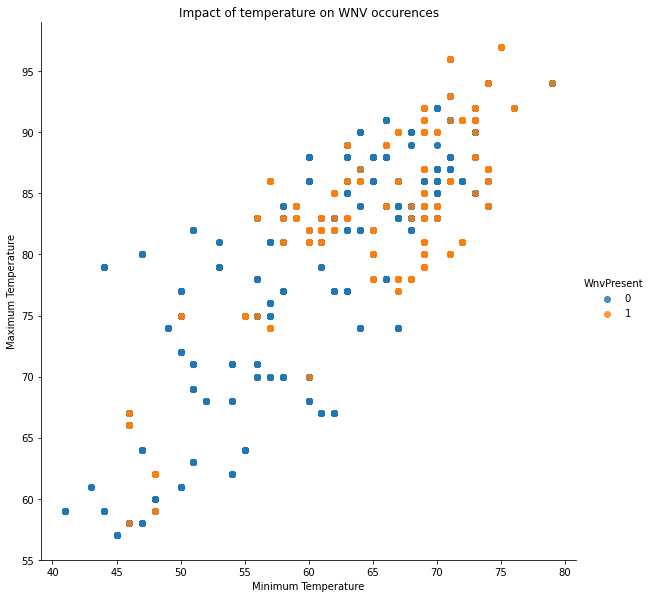

In [61]:
sns.lmplot( x='Tmin', y='Tmax', data=merged_df, fit_reg=False, hue='WnvPresent', height=8)
plt.title('Impact of temperature on WNV occurences')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature');

Mosquitos love warm weather. Warm weather also means a greater chance of infection. Research has shown that for mosquitos carrying West Nile virus, [the virus can be amplified](https://www.scientificamerican.com/article/west-nile-virus-global-warming/) in warmer weather. 
From the scatter plot, we can see that the occurences of West Nile Virus are more prevalent during days with hotter temperatures

**Humidity**

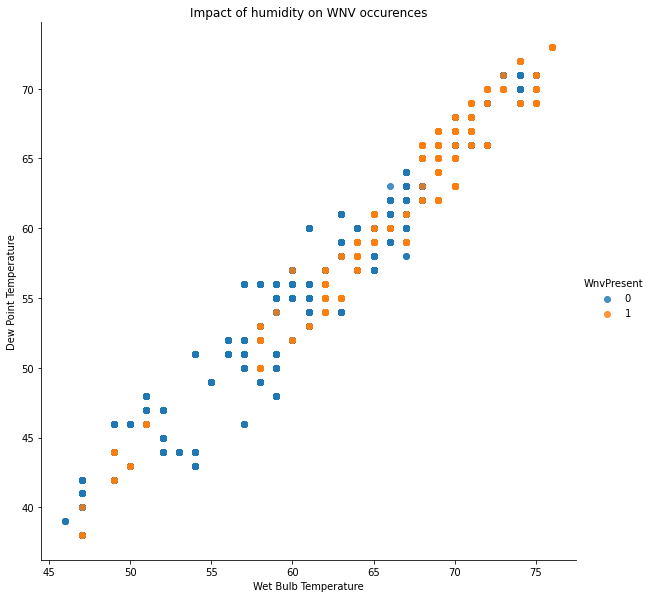

In [62]:
sns.lmplot( x='WetBulb', y='DewPoint', data=merged_df, fit_reg=False, hue='WnvPresent', height=8)
plt.title('Impact of humidity on WNV occurences')
plt.xlabel('Wet Bulb Temperature')
plt.ylabel('Dew Point Temperature');

From the scatter plot, we can see that the occurences of West Nile Virus are more prevalent during days with high humidity.

### Correlation Heatmap
Let's plot the correlation heatmap.

In [63]:
### Plot correlation heatmap
def plot_heatmap(df):
    fix, ax = plt.subplots(figsize=(22,22))

    mask = np.zeros_like(df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(df.corr(), mask=mask, ax=ax, cmap='coolwarm',vmin=-1, vmax=1,
                     square=True, linewidth=1,annot=True,annot_kws={'size':'13'},
                     cbar_kws={"shrink": 0.8}, fmt='.1g',center=0)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

    ax.set_title('Correlation Heatmap', fontsize=22);

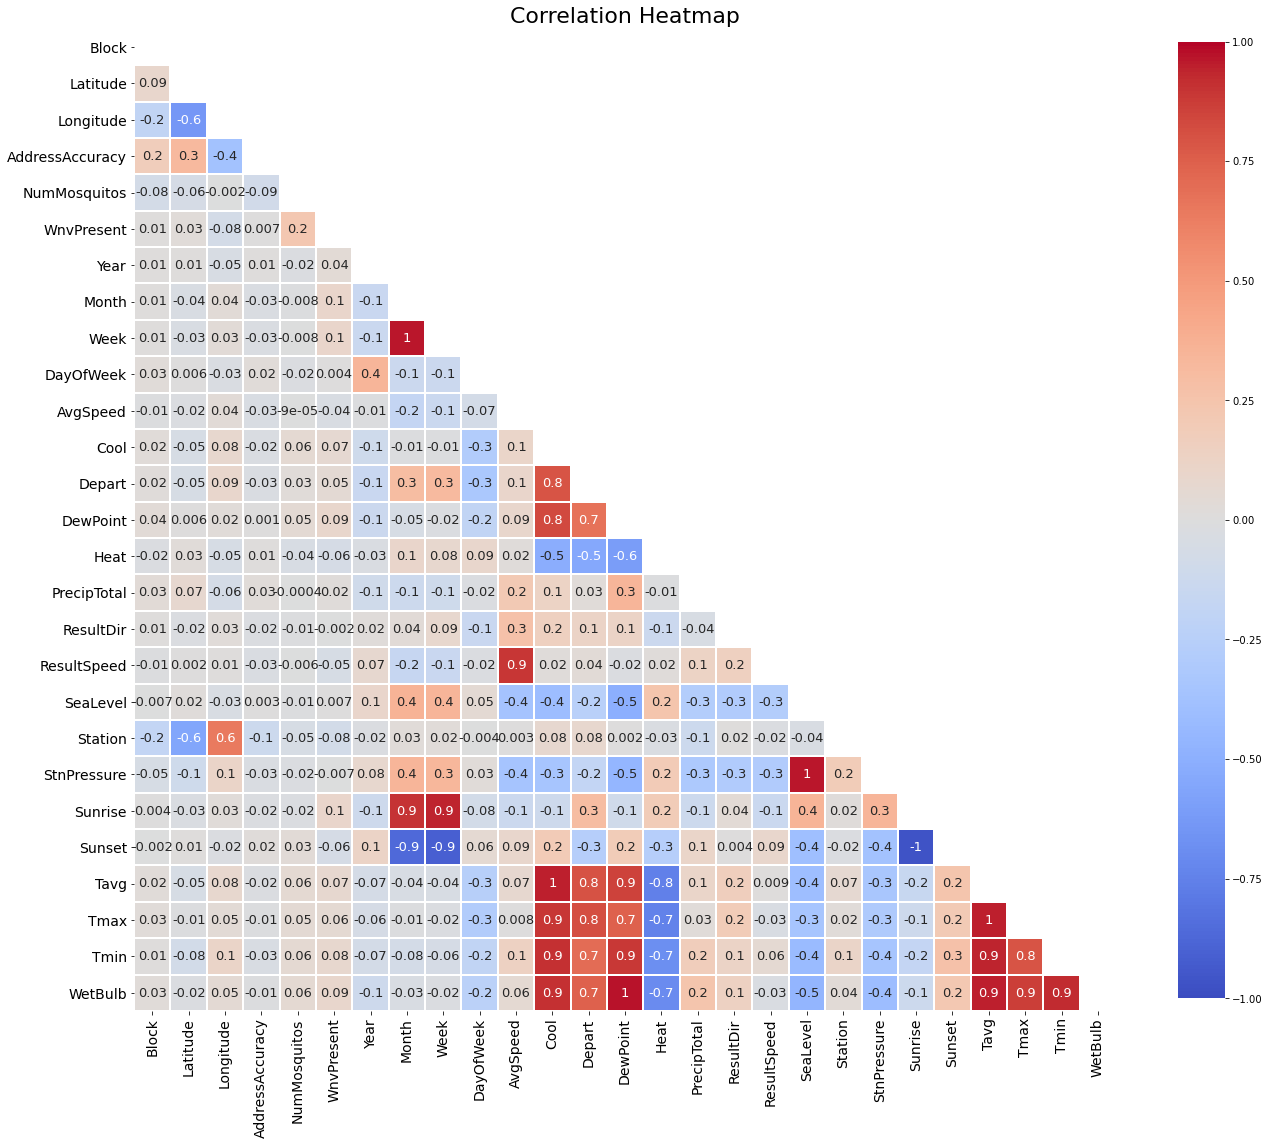

In [64]:
plot_heatmap(merged_df)

From the heatmap above, we can see that all our features have very low correlation with our target variable, WnvPresent. We can see presence of multicollinearity as some of the predictor variables have very high correlation between each other.

Due to the very low correlation between our predictors and target variable, we will have to perform feature engineering to extract more information from our data and improve the correlation scores.

## Next Steps

In the next notebook, we'll look into feature engineering, and the various preprocessing steps (eg. feature selection & one-hot encoding) to prepare our data for modeling.